Machine Learning Image Classification 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from keras.layers import Dense,Flatten, Conv2D, Dropout,MaxPooling2D


In [ ]:
# Load Data
from keras.datasets import cifar10
#The CIFAR-10 dataset consists of colour images in 10 classes
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [ ]:
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Checking the Shape of Data 

X_train.shape , Y_train.shape , X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

As we can see we get a 4D array for the X_train--50,000 rows of data of 32x32 img with depth 3,
Y_train data is 2D array with 1 column
X_test-4D Array with 10,000 rows with 32x32 img and depth 3 ,
Y_test - 2D array with 10,000 rows with 1 column

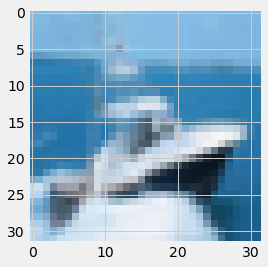

In [ ]:
# Lets Have Look at the Image 
index = 8
image = plt.imshow(X_train[index])

We Are Not Able to figure out what this image actually is so lets get the label for that image

In [ ]:
print('Label is ',Y_train[index])

Label is  [8]


In [ ]:
#lets have a look at what the label corresponds to 
classify = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

classify[Y_train[index][0]]

'ship'

Label is  [3]


'cat'

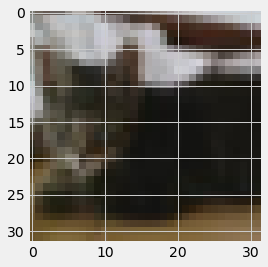

In [ ]:
# Lets Have Look at the Image 
ind = 9
image = plt.imshow(X_train[ind])
print('Label is ',Y_train[ind])
#lets have a look at what the label corresponds to 
classify = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

classify[Y_train[ind][0]]

In [ ]:
# labels to set of 10 numbers for Neural Network
# Using One Hot Encoding To Turn Categorical Features Into Numerical
y_train_one_hot = to_categorical(Y_train)
y_test_one_hot = to_categorical(Y_test)
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
print('The New Label', y_train_one_hot[ind])

(50000, 10)
(10000, 10)
The New Label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Noramlize The Pixel between 0 - 1
#This can be achieved by dividing all pixels values by the largest pixel value; that is 255
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [ ]:
# Model Architecture /Neural Network Architecture

model = Sequential()

#add first layer(cnn) to extract features from input image and create 32 5x5 relu feature map 

model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

# second Layer(pooling layer)
model.add(MaxPooling2D(pool_size = (2,2)))

# second cnn layer 
model.add(Conv2D(32,(5,5),activation='relu'))

# another Layer(pooling layer)
model.add(MaxPooling2D(pool_size = (2,2)))

#flattening Layer
model.add(Flatten())

# 1000 Neuron Layer
model.add(Dense(1000, activation='relu'))

#Drop Out Layer
model.add(Dropout(0.5))

# 500 Neuron Layer
model.add(Dense(500, activation='relu'))

#Drop Out Layer
model.add(Dropout(0.5))

#250 Neuron Layer
model.add(Dense(250, activation='relu'))

#10 Neuron Layer
model.add(Dense(10, activation='softmax'))

In [ ]:
#complie Model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train_one_hot,batch_size= 256, epochs=10, validation_split= 0.2 )

Epoch 1/10
157/157 [==============================] - 41s 261ms/step - loss: 1.7776 - accuracy: 0.3354 - val_loss: 1.4776 - val_accuracy: 0.4599
Epoch 2/10
157/157 [==============================] - 41s 264ms/step - loss: 1.4158 - accuracy: 0.4795 - val_loss: 1.3079 - val_accuracy: 0.5222
Epoch 3/10
157/157 [==============================] - 41s 259ms/step - loss: 1.2653 - accuracy: 0.5428 - val_loss: 1.1982 - val_accuracy: 0.5696
Epoch 4/10
157/157 [==============================] - 41s 261ms/step - loss: 1.1726 - accuracy: 0.5822 - val_loss: 1.1273 - val_accuracy: 0.6016
Epoch 5/10
157/157 [==============================] - 41s 264ms/step - loss: 1.0858 - accuracy: 0.6129 - val_loss: 1.0845 - val_accuracy: 0.6143
Epoch 6/10
157/157 [==============================] - 41s 260ms/step - loss: 1.0067 - accuracy: 0.6434 - val_loss: 1.0207 - val_accuracy: 0.6429
Epoch 7/10
157/157 [==============================] - 41s 263ms/step - loss: 0.9407 - accuracy: 0.6666 - val_loss: 1.0027 - val_ac

In [ ]:
# In newer versions the number on the left hand of the progress bar is actually the total number of images divided by batch size

In [ ]:
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 11ms/step - loss: 0.9314 - accuracy: 0.6779


0.6779000163078308

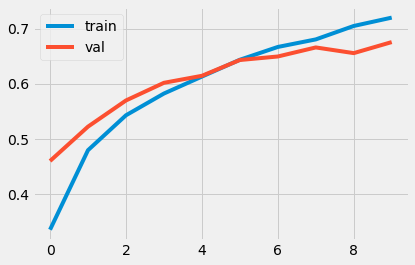

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','val'])
plt.show()

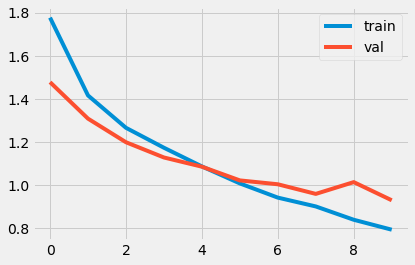

In [ ]:
# Model Loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','val'])
plt.show()

In [ ]:
# Model Test
from google.colab import files
uploaded = files.upload()

Saving car.jfif to car.jfif


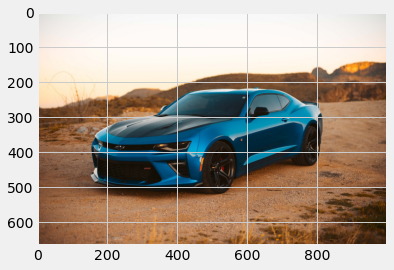

In [ ]:
new_image = plt.imread('car.jfif')
img = plt.imshow(new_image)


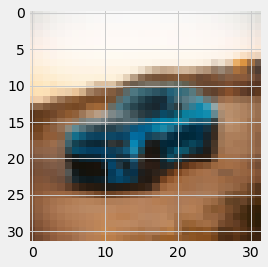

In [ ]:
from skimage.transform import resize 
resize_img = resize(new_image, (32,32,3))
img = plt.imshow(resize_img)

In [ ]:
prediction = model.predict(np.array([resize_img]))

prediction

array([[2.3299407e-02, 8.1902540e-01, 2.4395491e-04, 1.3499362e-04,
        6.8387203e-06, 4.3275169e-05, 1.3335972e-04, 4.6552865e-05,
        7.0449999e-03, 1.5002133e-01]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x= prediction

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i] 
      list_index[i] = list_index[j]
      list_index[j] = temp 

print(list_index)

[1, 9, 0, 8, 2, 3, 6, 7, 5, 4]


In [ ]:
for i in range(5):
  print(classify[list_index[i]],':' ,round(prediction[0][list_index[i]] * 100 ),'%')

automobile : 82 %
truck : 15 %
airplane : 2 %
ship : 1 %
bird : 0 %
